In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df = pd.read_csv(r"D:\programming\python\pyTrain\tensorflow\FINAL_TF2_FILES\TF_2_Notebooks_and_Data\DATA\cancer_classification.csv")

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
#checking if there is null data
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness e

&lt;AxesSubplot:xlabel=&#39;benign_0__mal_1&#39;, ylabel=&#39;count&#39;&gt;

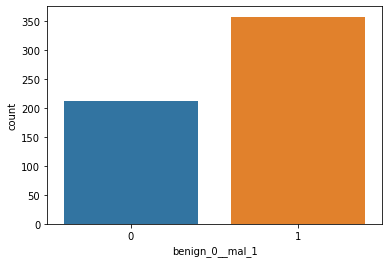

In [8]:
#checking if there the label
sns.countplot(x='benign_0__mal_1',data=df)

&lt;AxesSubplot:&gt;

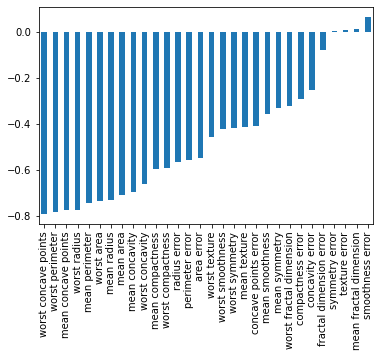

In [11]:
#visialisation to check correlation
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [12]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values


In [13]:
from sklearn.model_selection import train_test_split



In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler


In [16]:
scaler=MinMaxScaler()

In [17]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
"""Creating a model and overcoming overfitting"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
X_train.shape

(426, 30)

In [21]:
model=Sequential()

In [25]:
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#binary classification works better with sigmoid activation
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [29]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

step - loss: 0.0020 - val_loss: 0.1995
Epoch 408/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.2390
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.1937
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.3019
Epoch 411/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0096 - val_loss: 0.2750
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0346 - val_loss: 0.1358
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1248 - val_loss: 0.1082
Epoch 414/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0745 - val_loss: 0.1414
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0775 - val_loss: 0.2570
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0087 - val_loss: 0.1689
Epoch 417/600
14/14 [==============================]

&lt;tensorflow.python.keras.callbacks.History at 0x22503a4ce80&gt;

&lt;AxesSubplot:&gt;

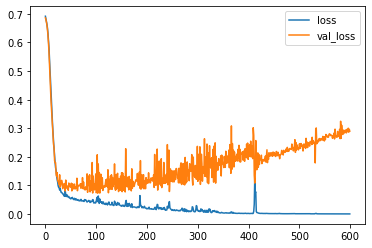

In [31]:
#plotting training loss and validation loss
losses=pd.DataFrame(model.history.history)
losses.plot()

In [51]:
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#binary classification works better with sigmoid activation
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
earl_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [53]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[earl_stop])

Epoch 1/600
14/14 [==============================] - 1s 39ms/step - loss: 0.7260 - val_loss: 0.6935
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6722 - val_loss: 0.6502
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6265 - val_loss: 0.6135
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5908 - val_loss: 0.5862
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5608 - val_loss: 0.5596
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5313 - val_loss: 0.5356
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5036 - val_loss: 0.5110
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4761 - val_loss: 0.4865
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4490 - val_loss: 0.4620
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4223 - val_loss: 0.4376
Epoch 11

&lt;tensorflow.python.keras.callbacks.History at 0x22508347a30&gt;

&lt;AxesSubplot:&gt;

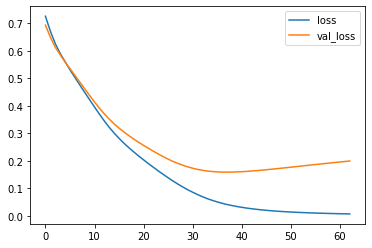

In [54]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [76]:
from tensorflow.keras.layers import Dropout

In [77]:
#prevent overfitting 
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
#binary classification works better with sigmoid activation
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [78]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[earl_stop])

Epoch 1/600
14/14 [==============================] - 1s 58ms/step - loss: 0.5981 - val_loss: 0.5632
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5748 - val_loss: 0.5416
Epoch 3/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5414 - val_loss: 0.5215
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5339 - val_loss: 0.5017
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5205 - val_loss: 0.4818
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4843 - val_loss: 0.4611
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4657 - val_loss: 0.4357
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4437 - val_loss: 0.4068
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4222 - val_loss: 0.3790
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3980 - val_loss: 0.3553
Epoch 1

&lt;tensorflow.python.keras.callbacks.History at 0x2251439c2e0&gt;

&lt;AxesSubplot:&gt;

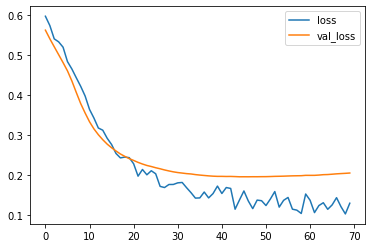

In [79]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [84]:
predictions=model.predict_classes(X_test)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [86]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 5 83]]
